Genere las siguientes secuencias para un largo de M=20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy

#x1 = sin(2pi 0.1n)


n = np.linspace(0,20,20) #genera un array de longitud 20 entre 0 y 5

x1 = np.sin(2 *3.14* 0.1 * n)
x2 = np.sin(2 *3.14* 0.05 * n)
x3 = np.sin(2 *3.14* 0.02 * n)
x4 = x1 + x2 + x3

#plt.plot(n, x1)
#plt.stem(n,x1)

#plt.plot(n, x2)
#plt.stem(n,x2)

#plt.plot(n, x3)
#plt.stem(n,x3)

#plt.plot(n, x4)
#plt.stem(n,x4)

plt.show()

Defina la siguiente secuencia, de largo M=10, y luego grafíquela con stem:
x(n) = sin(2𝜋 0.2 n)
2. Calcule la FFT de dicha secuencia y grafique su módulo.
Si bien la FFT es discreta, nos interesa como aproximación de la transformada
de Fourier, por lo cual, utilice plot para visualizarla como gráfico de línea. Sin
embargo, en este caso agregue la opción 'o-' (como tercer argumento) que
permite agregar al gráfico de líneas un marcador para distinguir mejor los
puntos del vector.


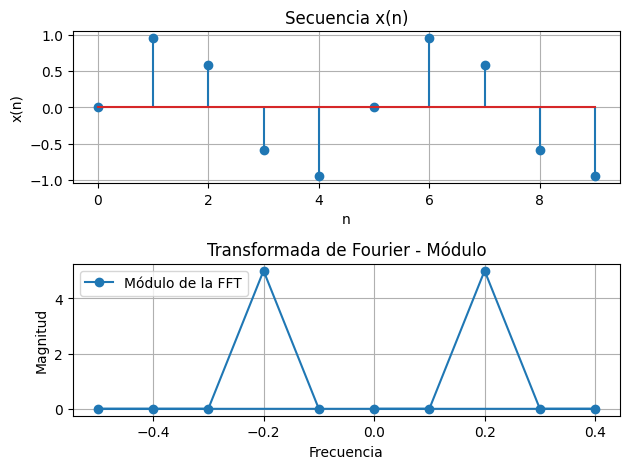

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy

M = 10 # largo de la secuencia

n = np.arange(M) # creo un vector donde almaceno 10 valores 
pi = np.pi
x1 = np.sin(2 *pi* 0.2 * n)

plt.subplot(2, 1, 1)
plt.stem(n, x1) # grafico con stem ( discreto)
plt.title('Secuencia x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)

#Calculo la FFT de la secuencia y grafico su modulo
x1_fft = np.fft.fft(x1)
freq = np.fft.fftfreq(M, d=1) #vector de frec
modulo = np.abs(x1_fft)

plt.subplot(2, 1, 2)
plt.plot(freq, modulo, 'o-', label='Módulo de la FFT')
plt.title('Transformada de Fourier - Módulo')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()

# Ajustar el gráfico
plt.tight_layout()
plt.show()

Sea un sistema FIR h(n) definido en base a los siguientes coeficientes:
h = {4, 3, 3.5, 4, 3, 2.5, 0.5, 0.3, 0.2}
1. Graficar la respuesta impulsiva y el módulo de la respuesta en frecuencia del
sistema h(n). Considere una cantidad de puntos de la FFT adecuada para una
mejor interpolación del gráfico en frecuencia.


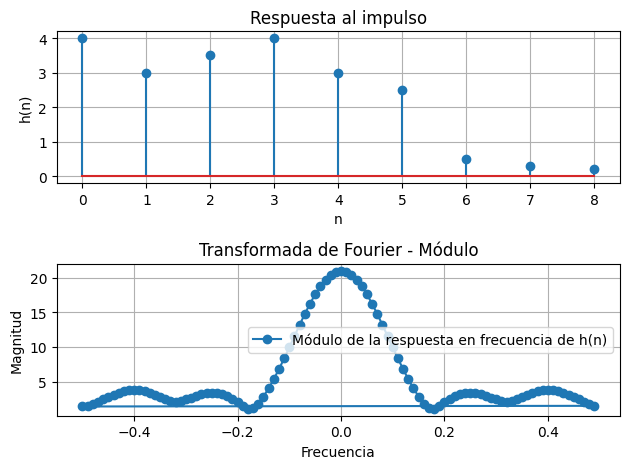

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy

h = np.array([4,3,3.5,4, 3, 2.5, 0.5, 0.3, 0.2]) #creo el vector correspondiente a la respuesta al impulso

n = len(h) # longitud del vector h
x = np.arange(n) # creo un vector de longitud n

plt.subplot(2, 1, 1)
plt.stem(x, h)
plt.title('Respuesta al impulso')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid(True)


#Modulo de la respuesta en frecuencia de h(n)
L = 100 #cantidad de puntos de la DFT. A mas puntos mejor definida queda
H = np.fft.fft(h, L)
freq = np.fft.fftfreq(L, d=1) #vector de frec
H_modulo = np.abs(H)

plt.subplot(2, 1, 2)
plt.plot(freq, H_modulo, 'o-', label='Módulo de la respuesta en frecuencia de h(n)')
plt.title('Transformada de Fourier - Módulo')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()

# Ajustar el gráfico
plt.tight_layout()
plt.show()

plt.show()






Graficar polos y ceros de h(n).

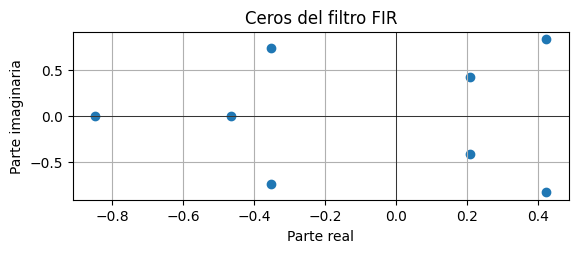

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import tf2zpk

h = np.array([4,3,3.5,4, 3, 2.5, 0.5, 0.3, 0.2]) #creo el vector correspondiente a la respuesta al impulso

zeros,_,_ = tf2zpk(h,[1]) # con esta funcion obtenes los ceros, polos y ganancia
plt.subplot(2, 1, 1)
plt.scatter(np.real(zeros), np.imag(zeros))
plt.title('Ceros del filtro FIR') # dado que es un filtro FIR solo tiene ceros 
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()






3. Sea una secuencia x(n) =  square(2*pi*0.02*n) de largo M =100 . calcular salida y(n).
Graficar su rta en tiempo y frec
Nota: utilizar tanto conv() como filter()

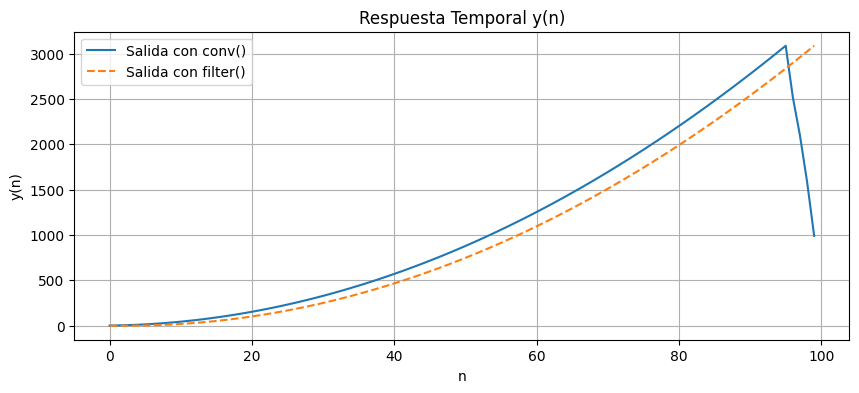

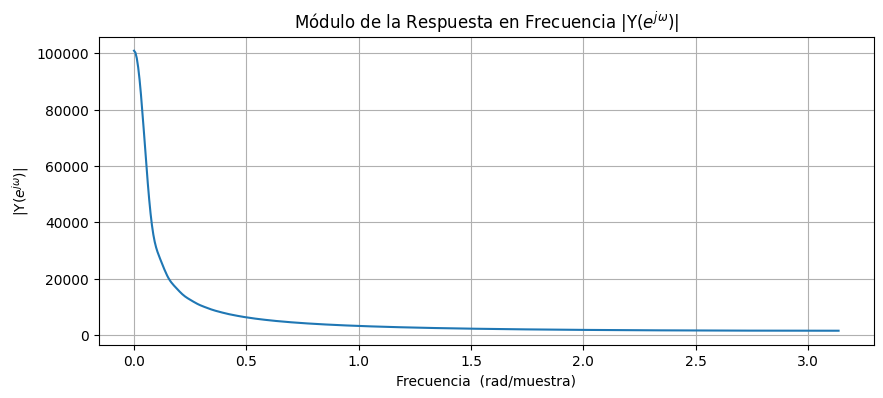

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import freqz, lfilter, square, convolve


h = np.array([4,3,3.5,4, 3, 2.5, 0.5, 0.3, 0.2]) #creo el vector correspondiente a la respuesta al impulso
largo = 100
pi = np.pi
n = np.arange(largo)
x = np.square(2*pi*0.02*n) #entrada del sistema lti. square hace referencia a la onda cuadrada

y = np.convolve(h , x,mode='same')
# Calcular la salida del sistema utilizando filter
y_filter = lfilter(h, 1, x)


plt.figure(figsize=(10, 4))
plt.plot(n, y,label='Salida con conv()')
plt.plot(n, y_filter, '--', label='Salida con filter()')
plt.title('Respuesta Temporal y(n)')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid(True)
plt.legend()
plt.show()

# Calcular y graficar el módulo de la respuesta en frecuencia de y(n)

w, Y = freqz(y_filter, worN=512) # w array de frecuencias( q contiene worN elem) ,
#worN es la cantidad de puntos de la FFT. 'Y' es un array complejo de la rta en frec correspondiente a cada valor de la frec
plt.figure(figsize=(10, 4))
plt.plot(w , np.abs(Y)) # si quisiera la frec normalizada deberia : "w / pi" esto me da la frec de 0 a 1 
#siendo el 1 la frec de nyquist
plt.title('Módulo de la Respuesta en Frecuencia |Y($e^{jω}$)|')
plt.xlabel('Frecuencia  (rad/muestra)')
plt.ylabel('|Y($e^{jω}$)|')
plt.grid(True)
plt.show()










Actividad 4. Sea un sistema IIR h(n) definido en base a los siguientes coeficientes:
b = {3, 1.5, 2} a = {1 -0.6}
1. Graficar el módulo de la respuesta en frecuencia del sistema h(n) utilizando la
función freqz(). Considere una cantidad de puntos de la variable 𝜔 para una mejor
interpolación del gráfico en frecuencia.
2. Graficar polos y ceros de h(n).
3. Utilice la misma onda cuadrada de la actividad anterior para obtener la salida del
sistema LTI).
4. ¿Qué ocurre si los coeficientes del denominador ahora son a = {1 -1.2}? Repita los
puntos anteriores y obtenga conclusiones.


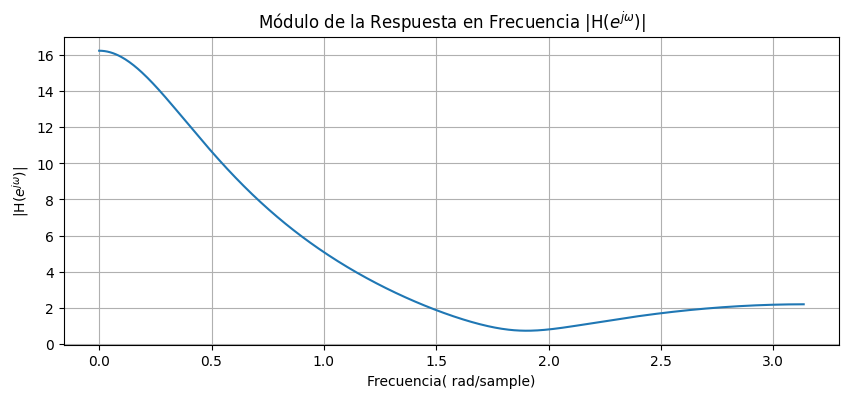

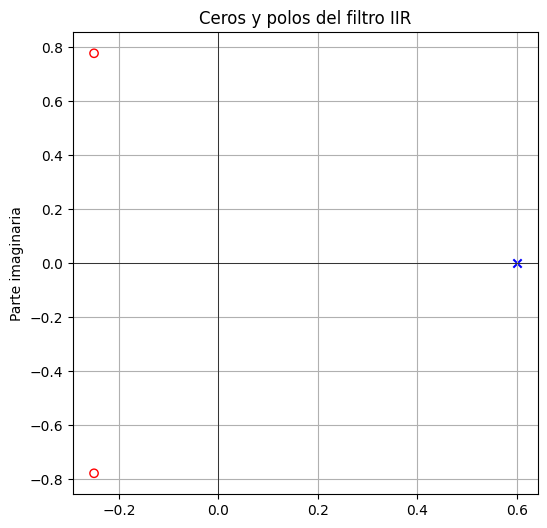

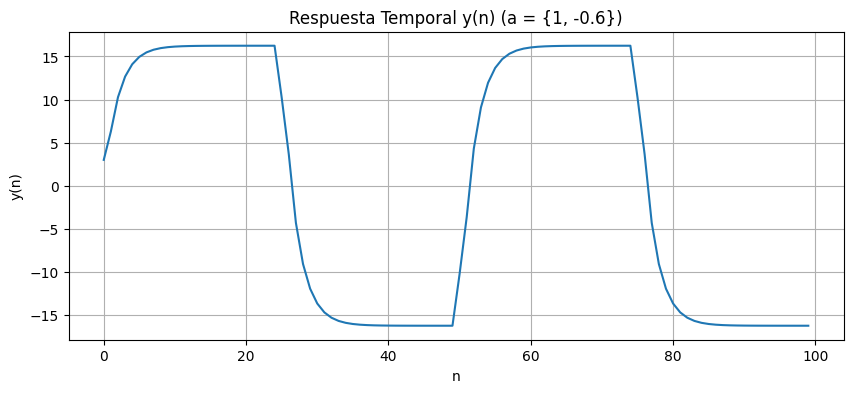

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import freqz, lfilter, square, convolve, tf2zpk

#coeficientes
b = np.array([3, 1.5, 2])
a = np.array([1,-0.6])

#Graficar el módulo de la respuesta en frecuencia del sistema h(n) utilizando la función freqz().
w, H = freqz(b,a, worN=512)

plt.figure(figsize=(10, 4))
plt.plot(w , np.abs(H))
plt.title('Módulo de la Respuesta en Frecuencia |H($e^{jω}$)|')
plt.xlabel('Frecuencia( rad/sample)')
plt.ylabel('|H($e^{jω}$)|')
plt.grid(True)
plt.show()

#Graficar polos y ceros de h(n).

ceros,polos,_ = tf2zpk(b,a) # con esta funcion obtenes los ceros, polos y ganancia
plt.figure(figsize=(6, 6))
plt.scatter(np.real(ceros), np.imag(ceros), marker='o', facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='b', label='Polos')
plt.title('Ceros y polos del filtro IIR') 
plt.ylabel('Parte imaginaria')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

#Utilice la misma onda cuadrada de la actividad anterior para obtener la salida del sistema LTI).

# entrada x(n)
M = 100
n = np.arange(M)
x = square(2 * np.pi * 0.02 * n)

# Calcular la salida del sistema utilizando filter
y = lfilter(b, a, x)

# Graficar la salida y(n) en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(n, y)
plt.title('Respuesta Temporal y(n) (a = {1, -0.6})')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid(True)
plt.show()






#Repita los puntos anteriores y obtenga conclusiones con a = {1 -1.2}

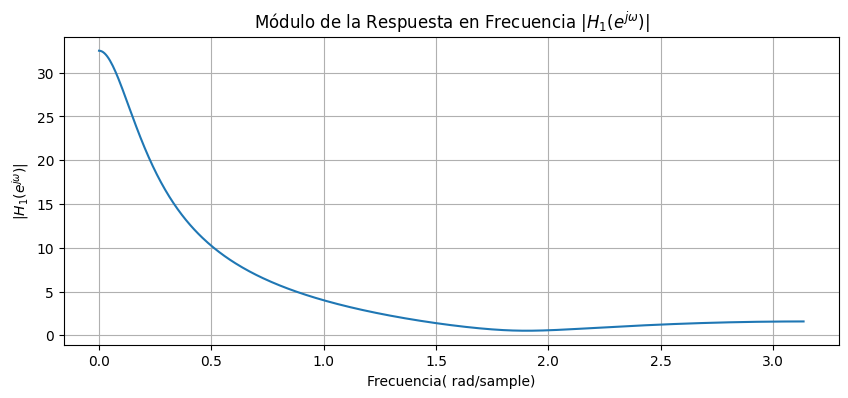

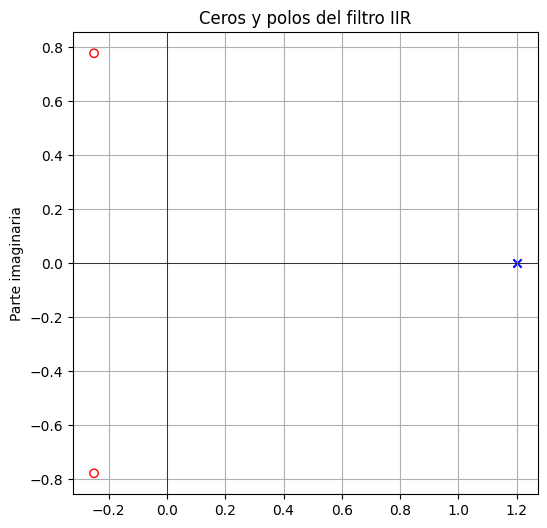

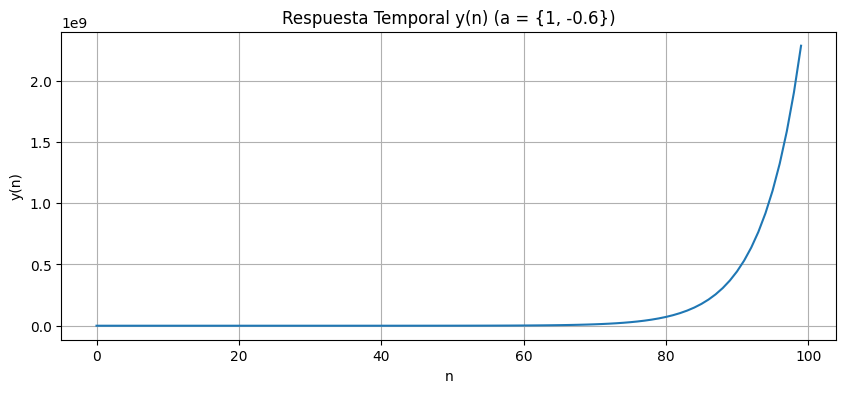

In [38]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import freqz, lfilter, square, convolve, tf2zpk

#coeficientes
b = np.array([3, 1.5, 2])


#Repita los puntos anteriores y obtenga conclusiones con a = {1 -1.2}

a_1 = np.array([1 ,-1.2])

w_1, H_1 = freqz(b,a_1, worN=512)

plt.figure(figsize=(10, 4))
plt.plot(w_1 , np.abs(H_1))
plt.title('Módulo de la Respuesta en Frecuencia |$H_1$($e^{jω}$)|')
plt.xlabel('Frecuencia( rad/sample)')
plt.ylabel('|$H_1$($e^{jω}$)|')
plt.grid(True)
plt.show()

#Graficar polos y ceros de h(n).

zeros,poles,_ = tf2zpk(b,a_1) # con esta funcion obtenes los ceros, polos y ganancia
plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='b', label='Polos')
plt.title('Ceros y polos del filtro IIR') 
plt.ylabel('Parte imaginaria')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

#Utilice la misma onda cuadrada de la actividad anterior para obtener la salida del sistema LTI).

# entrada x(n)
M = 100
n = np.arange(M)
x = square(2 * np.pi * 0.02 * n)

# Calcular la salida del sistema utilizando filter
y = lfilter(b, a_1, x)
# Graficar la salida y(n) en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(n, y)
plt.title('Respuesta Temporal y(n) (a = {1, -0.6})')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid(True)
plt.show()

Con a = {1, -0.6}, el sistema tiene polos dentro del círculo unitario, lo que indica un sistema estable.
Con a = {1, -1.2}, los polos pueden salir del círculo unitario, lo que podría llevar a un sistema inestable o con una respuesta amplificada en ciertas frecuencias.